#1.Author
**Student name:** Nikolas Sokratous

**Student Id:** 210270930

#2.Problem formulation

Nowadays, products like amazon's Alexa are becoming the norm in everyday people homes. Alexa is a very useful tool and its connectivity to the internet, in amazon marketplace, Deliveroo, uber eats and others, helps as save a lot of time in shopping and online ordering. 

That doesn’t mean though that has no problems. A lot of parents came to the realization that their young Childers can also use those tools. That realization came after big bills for toys that their children order though amazon Alexa and food from Deliveroo.

On one occasion a video went viral after a father open the door and saw 12 large pizzas order by his young son. 
In another occasion a Mother found a bill of 400$ from order that their children made using Alexa.

To solve this problem will use the MLEnd Hums and Whistles dataset to train a model to identify subjects from their voice characteristics those giving identity to a voice. 

**Why our dataset is suitable for this problem?**

The hum part of the dataset is ideal for our problem. The number of predictors and labels for each label estimated to be around 48. That is a small amount of data but in a realistic scenario if that was a build in app in Alexa, we want to make it work for as little input as possible so that people don't have to dedicate ours to use it. Another thing that works in the favorite of the problem is the humming. Humming is very simple and have the population that is going to use the model are young children meaning we want to be able to identify a subject event from humming.


#3.Machine Learning pipeline
 The pipeline that was used is consist of prepossessing for the data (data cleaning->feature extraction), training using 3 deferent ML models (SVM, logistic regressions and Naive Bayes classifier) and Evaluation, using training and validation accuracies and confusion matrix.


#4.Transformation stage
In this stage, after we first load our data, we will then clean our data and keep only the ones where the naming of the files is correct (using regular expression) and then extract the following 4 features:

1.   Power.
2.   Pitch mean.
3.   Pitch standard deviation.
4.   Fraction of voiced region.


# Environment set up

In this section we will set up a Colab environment for the MLEnd mini-project. This is an environment set up for the basic approach of the mini project. First having as a template, the starter kit from the laps I follow the next steps.: 

1.   Go to https://drive.google.com/
2.   Used the already created folder "data" and "MLEndHW" inside it.

Then I am loading the following libraries and mounting my personal Google Drive storage system (i.e. making it available).


In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


# Data download

In this section I will download the Potter and StarWars of the MLEnd Hums and Whistles Dataset. 

First, I will use the function from the started kit to allow me to download a file into a chosen location.

In [ ]:
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

The next step is to download the file 'MLEndHW_potter1.zip' into the folder 'MyDrive/Data/MLEndHW'. 

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=6P0I5CAE7JPPKNDU/4P729FD6DFNO8IT4NNFR458"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_potter1.zip'
download_url(url, save_path)

Then I run the following cell to check that the MLEndHW folder contains the file 'MLEndHW_Sample.zip':

In [ ]:
path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

['MLEndHW_Sample.zip', 'sample', 'MLEndHW_potter1.zip']

Now I will do the same prosecc for 'MLEenHW_potter2.zip','MLEenHW_StarWars1.zip' and 'MLEenHW_StarWars2.zip'


In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=452THMOKUOST11V4/4L7IBFL5AJ3AMR45JVV9AC0"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_potter2.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=4HOGB7IH67J8QGL3/5D5TJMIP30DFVC69AQU5ETO"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_StarWars1.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=4LUHB7IH67J8QGL3/6T5IF3SK8KQTL7FRD2113DO"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_StarWars2.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=6P5DHMOKUOST11V4/45V197K56GJCN375FM97GKO"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Panther1.zip'
download_url(url, save_path)
url  = "https://collect.qmul.ac.uk/down?t=556JF9IP9676AAIB/450D7KAI0S5U15VGE2A7MKO"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Panther2.zip'
download_url(url, save_path)
url  = "https://collect.qmul.ac.uk/down?t=610DVT8AV0VTD6FQ/4PSHB4CI8V5Q0LTGMBBBVO0"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Rain1.zip'
download_url(url, save_path)
url  = "https://collect.qmul.ac.uk/down?t=5163F9QO9A6M8AQ8/6P0T9MQO34CVTCEEA6K4AR8"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Rain2.zip'
download_url(url, save_path)
url  = "https://collect.qmul.ac.uk/down?t=555I92D6GH5I5L9M/59UH97479B4AQOLUKB0QI08"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Hakuna1.zip'
download_url(url, save_path)
url  = "https://collect.qmul.ac.uk/down?t=6TF3DEBMAIDN49A6/6L4DRTRS7KUT51CTGADNEN8"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Hakuna2.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=554DRGJTDMH4I3JF/595DLIDADVHOGJTBM3BRS68"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Mamma1.zip'
download_url(url, save_path)
url  = "https://collect.qmul.ac.uk/down?t=4HVHB72J6VS9UK5D/610DRSJH409EFA60BQVQQ20"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Mamma2.zip'
download_url(url, save_path)
url  = "https://collect.qmul.ac.uk/down?t=5942PCQC7ROPGNTS/6PF33CLHC39AEQ41JJS9AC8"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Showman1.zip'
download_url(url, save_path)
url  = "https://collect.qmul.ac.uk/down?t=6132RDI977V9AMLR/6L7J7ETOF7SPSKDEMB5Q81G"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Showman2.zip'
download_url(url, save_path)
url  = "https://collect.qmul.ac.uk/down?t=4LV194DEJH9JLV8U/652DJI5BDRM82DIIPKKCFQ0"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Frozen1.zip'
download_url(url, save_path)
url  = "https://collect.qmul.ac.uk/down?t=6TDILDI977V9AMLR/6P4TPGT0A70LC6BHTK7VPMG"
save_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Frozen2.zip'
download_url(url, save_path)

In [ ]:
path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

['MLEndHW_Sample.zip',
 'sample',
 'MLEndHW_potter1.zip',
 'MLEndHW_potter2.zip',
 'MLEndHW_StarWars1.zip',
 'MLEndHW_StarWars2.zip',
 'basic',
 'MLEndHW_Panther1.zip',
 'MLEndHW_Panther2.zip',
 'MLEndHW_Rain1.zip',
 'MLEndHW_Rain2.zip',
 'MLEndHW_Hakuna1.zip',
 'MLEndHW_Hakuna2.zip',
 'MLEndHW_Mamma1.zip',
 'MLEndHW_Mamma2.zip',
 'MLEndHW_Showman1.zip',
 'MLEndHW_Showman2.zip',
 'MLEndHW_Frozen1.zip',
 'MLEndHW_Frozen2.zip']

# Understanding our dataset sample

Now we will unzip the data set and place it inside folder name 'basic'


In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/basic/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_potter1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/basic/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_potter2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/basic/*.wav'
files = glob.glob(sample_path)
len(files)

411

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/basic/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_StarWars1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/basic/*.wav'
files = glob.glob(sample_path)
len(files)

619

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/basic/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_StarWars2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/basic/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Hakuna2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/basic/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Panther1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Panther2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Rain1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Rain2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Hakuna1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Mamma1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Mamma2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/basic/*.wav'
files = glob.glob(sample_path)
len(files)

2474

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/basic/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Showman1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/basic/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Showman2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/basic/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Showman1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/basic/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Showman2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/basic/*.wav'
files = glob.glob(sample_path)
len(files)

2884

As you can see, the name of each file follows the naming convention `[Participant ID]_[type of recording]_[interpretation number]_[song]`. We can parse each file name and extract this information. Let's do it for the first one:

In [ ]:
print('The full path to the first audio file is: ', files[0])
print('\n')
print('The name of the first audio file is: ', files[0].split('/')[-1])
print('    The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('    The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/Data/MLEndHW/basic/S20_hum_2_Potter.wav


The name of the first audio file is:  S20_hum_2_Potter.wav
    The participand ID is:  S20
    The type of interpretation is:  hum
    The interpretation number is:  2
    The song is:  Potter.wav


**Data cleaning**

Before we go any further, we should first used regular expression to filter out any file names that don't have the right structure. If we amend this, it will cause error later in the creation of our table.

We choose to not include any whistle files in our dataset, because whistles have no close similarities with speech.


In [ ]:
pattern = re.compile(r'(S\d+_hum_[1-4]_Potter\.wav[^.\s]|S\d+_hum_[1-4]_StartWars\.wav[^.\s]|S\d+_hum_[1-4]_Rain\.wav[^.\s]|S\d+_hum_[1-4]_Panther\.wav[^.\s]|S\d+_hum_[1-4]_Hakuna\.wav[^.\s]|S\d+_hum_[1-4]_Mamma\.wav[^.\s]|S\d+_hum_[1-4]_Showman\.wav[^.\s]|S\d+_hum_[1-4]_Frozen\.wav[^.\s])')

In [ ]:
f=str(files)
cleanfiles = pattern.findall(f)


In [ ]:
print(len(cleanfiles))

1395


In [ ]:
print(cleanfiles)

["S20_hum_2_Potter.wav'", "S21_hum_1_Potter.wav'", "S21_hum_2_Potter.wav'", "S22_hum_1_Potter.wav'", "S22_hum_2_Potter.wav'", "S23_hum_1_Potter.wav'", "S23_hum_2_Potter.wav'", "S24_hum_2_Potter.wav'", "S25_hum_1_Potter.wav'", "S25_hum_2_Potter.wav'", "S26_hum_1_Potter.wav'", "S26_hum_2_Potter.wav'", "S28_hum_1_Potter.wav'", "S28_hum_2_Potter.wav'", "S29_hum_2_Potter.wav'", "S30_hum_1_Potter.wav'", "S30_hum_2_Potter.wav'", "S31_hum_1_Potter.wav'", "S31_hum_2_Potter.wav'", "S32_hum_2_Potter.wav'", "S34_hum_2_Potter.wav'", "S36_hum_1_Potter.wav'", "S36_hum_2_Potter.wav'", "S39_hum_2_Potter.wav'", "S41_hum_1_Potter.wav'", "S41_hum_2_Potter.wav'", "S43_hum_2_Potter.wav'", "S44_hum_2_Potter.wav'", "S45_hum_2_Potter.wav'", "S46_hum_1_Potter.wav'", "S46_hum_2_Potter.wav'", "S50_hum_2_Potter.wav'", "S51_hum_1_Potter.wav'", "S51_hum_2_Potter.wav'", "S52_hum_2_Potter.wav'", "S53_hum_1_Potter.wav'", "S53_hum_2_Potter.wav'", "S54_hum_2_Potter.wav'", "S56_hum_2_Potter.wav'", "S57_hum_2_Potter.wav'",

We can create a table-like structure using Python lists that collects the information that we can extract from the names of the audio files:

In [ ]:
MLENDHW_table = [] 

for file in cleanfiles:
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[2]
  song = file.split('/')[-1].split('_')[3].split('.')[0]
  file_name=participant_ID+'_'+interpretation_type+'_'+interpretation_number+'_'+song+'.wav'
  MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_table

[['S20_hum_2_Potter.wav', 'S20', 'hum', '2', 'Potter'],
 ['S21_hum_1_Potter.wav', 'S21', 'hum', '1', 'Potter'],
 ['S21_hum_2_Potter.wav', 'S21', 'hum', '2', 'Potter'],
 ['S22_hum_1_Potter.wav', 'S22', 'hum', '1', 'Potter'],
 ['S22_hum_2_Potter.wav', 'S22', 'hum', '2', 'Potter'],
 ['S23_hum_1_Potter.wav', 'S23', 'hum', '1', 'Potter'],
 ['S23_hum_2_Potter.wav', 'S23', 'hum', '2', 'Potter'],
 ['S24_hum_2_Potter.wav', 'S24', 'hum', '2', 'Potter'],
 ['S25_hum_1_Potter.wav', 'S25', 'hum', '1', 'Potter'],
 ['S25_hum_2_Potter.wav', 'S25', 'hum', '2', 'Potter'],
 ['S26_hum_1_Potter.wav', 'S26', 'hum', '1', 'Potter'],
 ['S26_hum_2_Potter.wav', 'S26', 'hum', '2', 'Potter'],
 ['S28_hum_1_Potter.wav', 'S28', 'hum', '1', 'Potter'],
 ['S28_hum_2_Potter.wav', 'S28', 'hum', '2', 'Potter'],
 ['S29_hum_2_Potter.wav', 'S29', 'hum', '2', 'Potter'],
 ['S30_hum_1_Potter.wav', 'S30', 'hum', '1', 'Potter'],
 ['S30_hum_2_Potter.wav', 'S30', 'hum', '2', 'Potter'],
 ['S31_hum_1_Potter.wav', 'S31', 'hum', '1', 'Po

We can load the table into a Pandas DataFrame and usie the additional functionalities of Pandas to explore the information extracted from the names of the audio files.

In [ ]:
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S20_hum_2_Potter.wav,S20,hum,2,Potter
S21_hum_1_Potter.wav,S21,hum,1,Potter
S21_hum_2_Potter.wav,S21,hum,2,Potter
S22_hum_1_Potter.wav,S22,hum,1,Potter
S22_hum_2_Potter.wav,S22,hum,2,Potter
...,...,...,...,...
S218_hum_1_Showman.wav,S218,hum,1,Showman
S219_hum_3_Showman.wav,S219,hum,3,Showman
S219_hum_4_Showman.wav,S219,hum,4,Showman


**Finding our 4 subjects**

Now we will try to find the subject with the biggest number of correct recorders humming’s. We choose to go with the number 4 because that the number of the average European family has 1,6 children thus the average family size is closer to 4.


In [ ]:
from collections import Counter
counter=Counter(MLENDHW_df['participant'])
common_elements = counter.most_common(4)
print(common_elements)

[('S20', 12), ('S21', 12), ('S22', 12), ('S23', 12)]


In [ ]:
MLENDHW_table_adv=[]
for file in cleanfiles:
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[2]
  song = file.split('/')[-1].split('_')[3].split('.')[0]
  file_name=participant_ID+'_'+interpretation_type+'_'+interpretation_number+'_'+song+'.wav'
  if participant_ID=='S20' or participant_ID=='S21' or participant_ID=='S22' or participant_ID=='S23':
    MLENDHW_table_adv.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_table_adv.sort(reverse=False, key=lambda x: x[1])
MLENDHW_df = pd.DataFrame(MLENDHW_table_adv,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S20_hum_2_Potter.wav,S20,hum,2,Potter
S20_hum_1_Potter.wav,S20,hum,1,Potter
S20_hum_2_Panther.wav,S20,hum,2,Panther
S20_hum_4_Panther.wav,S20,hum,4,Panther
S20_hum_1_Rain.wav,S20,hum,1,Rain
S20_hum_4_Rain.wav,S20,hum,4,Rain
S20_hum_1_Hakuna.wav,S20,hum,1,Hakuna
S20_hum_2_Hakuna.wav,S20,hum,2,Hakuna
S20_hum_2_Mamma.wav,S20,hum,2,Mamma


# Feature extraction : Picth

Audio files are complex data types. Specifically they are **discrete signals** or **time series**, consisting of values on a 1D temporal grid. These values are known as *samples* themselves, which might be a bit confusing, as we have used this term to refer to the *items* in our dataset. The **sampling frequency** is the rate at which samples in an audio file are produced. For instance a sampling frequency of 5HZ indicates that 5 produce 5 samples per second, or 1 sample every 0.2 s.

Let's plot one of our audio signals:

Before doing that we first have to merge our path with the now clean data

In [ ]:
finfiles=[]
for file in MLENDHW_table_adv:
  finfiles.append('/content/drive/MyDrive/Data/MLEndHW/basic/'+file[0])
print(finfiles[0])


/content/drive/MyDrive/Data/MLEndHW/basic/S20_hum_2_Potter.wav


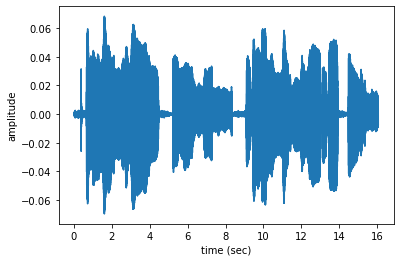

In [ ]:
n=0
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(finfiles[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [ ]:
MLENDHW_df.loc[finfiles[n].split('/')[-1]]

participant          S20
interpretation       hum
number                 2
song              Potter
Name: S20_hum_2_Potter.wav, dtype: object

In [ ]:
n=0
x, fs = librosa.load(finfiles[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 708095 samples


Next we will extract the same se of features that were used in the labs to reduce the dimensions of out dataset:


1.   Power.
2.   Pitch mean.
3.   Pitch standard deviation.
4.   Fraction of voiced region.

In the next cell, we define a new function that gets the pitch of an audio signal.

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

The problem is to identify every individual in our dataset. The next cell defines a function (same function as the lab with the distinction of changing from 'iteration' to 'participant') that takes a number of files and creates a NumPy array containing the 4 audio features used as predictors (`X`) and a label (`y`), that gives a value from 0-3 to each subject.

In [ ]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    if labels_file.loc[fileID]['participant']=='S20':
        yi=0
    elif labels_file.loc[fileID]['participant']=='S21':
        yi=1
    elif labels_file.loc[fileID]['participant']=='S22':
        yi=2
    else:
        yi=3

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

Now we apply `getXy` to the subsample and obtain the NumPy predictor array (`X`) and a binary label (`y`) for our 48 data.

In [ ]:
print(len(finfiles),len(MLENDHW_df))

48 48


In [ ]:
X,y = getXy(finfiles, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 48/48 [02:12<00:00,  2.76s/it]


The next cell shows the shape of `X` and `y` and prints the labels vector `y`:

In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (48, 4)
The shape of y is (48,)
The labels vector is [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 4
 4 4 4 4 4 4 4 4 4 4 4]


#5.Modelling
The plan is to create 3 different model and expect each one of them choosing the one that perform best. 

1. **SVM(support-vector machines)**: The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. 
2.**Logistic regression:** Logistic "regression" classifiers use the likelihood function  L  as the objective function. Given a dataset, the best classifier is defined as the one with the highest likelihood value. This classifier also provides the highest log-likelihood value and obviously the lowest negative log-likelihood value.
3.**Naive Bayes classifier:**Bayes rule mean that we can build posterior probabilities using the priors for each class and the class densities.


#6.Methodology
Three different models are going to be used for the training of three different models. All three of the models will used 65% of the data for training and 35% of it for validation. 
After the training of each model we will extract training, validation accuracies and confusion matrix to evaluate our result. At the end a single model will be choose for deployment.


#7. Dataset
The dataset that is going to be used is the MLEnd Hums and Whistles dataset,8 songs accounted for 824 files. The dataset then was clean based on the naming of each file. Whistle files were removed since the whistle of a subject is not relatable with his voice. After that we choose 4 subjects in random to use for the experament.4 features were extracted from it and used as the predictors. After cleaning the final length of the dataset drop to 128, 4 subject X 8 songs X 2 hum.

Then the subject id of each file was used as the label with each subject getting a number from 0-3. That gave as a shape (48, 4) for the predictors and (48) for the labels. After that we broke the dataset into training (65%) and validating (35%) dataset with shapes (31, 4), (17, 4) for the predictors and (31,), (17,) for the labels respectively. Finally, the predictors values were normalized as that followed by a greater accuracy.
 

#8.Results
**Support Vector Machines (first method)**

Now we will build a support vector machine (SVM) model for the predictive task of identifying the each user of an audio signal, using the dataset that we have just created.

We will use the SVM method provided by scikit-learn and will split (65/35) the dataset defined by X and y into a training set and a validation set.

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.35)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31, 4), (17, 4), (31,), (17,))

In [ ]:
print(y_val)

[2 0 4 4 0 1 2 1 0 0 2 4 0 4 1 4 2]


Now we fit an SVM model and print both the training accuracty and validation accuracy.


In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.45161290322580644
Validation  Accuracy 0.47058823529411764
The support vectors are (31, 4)


Since validation and training accuracies are close, we believe that our model perform well.

Let's normalize the predictors, to see if the performance improves.



In [ ]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 1.0
Validation  Accuracy 0.8235294117647058
The support vectors are (31, 4)


Both accuracies improved although training accuracy is 90% compared to 80% for the validation accuracy. That drive us to the conclusion that our model overfit. 
Now, using a confusion matrix we will see exactly how our model classify each value.


In [ ]:
from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_true=y_train, y_pred=model.predict(X_train))
train_confusion_matrix_normalised = train_confusion_matrix.astype('float') / train_confusion_matrix.sum(axis=1)[:, np.newaxis]

val_confusion_matrix = confusion_matrix(y_true=y_val, y_pred=model.predict(X_val))
val_confusion_matrix_normalised = val_confusion_matrix.astype('float') / val_confusion_matrix.sum(axis=1)[:, np.newaxis]

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix))
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix))

print('Normalised training confusion matrix:\n {}\n'.format(train_confusion_matrix_normalised))
print('Normalised validation confusion matrix:\n {}\n'.format(val_confusion_matrix_normalised))

Training confusion matrix:
 [[7 0 0 0]
 [0 9 0 0]
 [0 0 8 0]
 [0 0 0 7]]

Validation confusion matrix:
 [[5 0 0 0]
 [0 3 0 0]
 [0 1 3 0]
 [0 2 0 3]]

Normalised training confusion matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Normalised validation confusion matrix:
 [[1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.25 0.75 0.  ]
 [0.   0.4  0.   0.6 ]]



**Logistic regresion (second method)**

Now we will try to train a new model using logistic regression and compare the results. 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Here we fit our logistic regression classfier to the training dataset 
log_reg_classifier = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
log_reg_classifier.fit(X_train, y_train)

print('Training accuracy of the logistic classifier: {}'.format(log_reg_classifier.score(X_train, y_train)))
print('Validation accuracy of the logistic classifier: {}'.format(log_reg_classifier.score(X_val, y_val)))

Training accuracy of the logistic classifier: 1.0
Validation accuracy of the logistic classifier: 0.9411764705882353


In [ ]:
from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_true=y_train, y_pred=log_reg_classifier.predict(X_train))
train_confusion_matrix_normalised = train_confusion_matrix.astype('float') / train_confusion_matrix.sum(axis=1)[:, np.newaxis]

val_confusion_matrix = confusion_matrix(y_true=y_val, y_pred=log_reg_classifier.predict(X_val))
val_confusion_matrix_normalised = val_confusion_matrix.astype('float') / val_confusion_matrix.sum(axis=1)[:, np.newaxis]

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix))
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix))

print('Normalised training confusion matrix:\n {}\n'.format(train_confusion_matrix_normalised))
print('Normalised validation confusion matrix:\n {}\n'.format(val_confusion_matrix_normalised))

Training confusion matrix:
 [[7 0 0 0]
 [0 9 0 0]
 [0 0 8 0]
 [0 0 0 7]]

Validation confusion matrix:
 [[5 0 0 0]
 [0 3 0 0]
 [0 1 3 0]
 [0 0 0 5]]

Normalised training confusion matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Normalised validation confusion matrix:
 [[1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.25 0.75 0.  ]
 [0.   0.   0.   1.  ]]



**Naive Bayes classifier (third method)**

Finally we will train a modell using the Naive Bayes classifier.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_A = GaussianNB()
gnb_A.fit(X_train, y_train)
print('Training accuracy : {}'.format(gnb_A.score(X_train, y_train)))
print('Validation accuracy : {}'.format(gnb_A.score(X_val, y_val)))

Training accuracy : 0.9354838709677419
Validation accuracy : 0.9411764705882353


In [ ]:
train_confusion_matrix_naive_A = confusion_matrix(y_true=y_train, y_pred=gnb_A.predict(X_train))
train_confusion_matrix_normalised_naive_A = train_confusion_matrix_naive_A.astype('float') / train_confusion_matrix_naive_A.sum(axis=1)[:, np.newaxis]

val_confusion_matrix_naive_A = confusion_matrix(y_true=y_val, y_pred=gnb_A.predict(X_val))
val_confusion_matrix_normalised_naive_A = val_confusion_matrix_naive_A.astype('float') / val_confusion_matrix_naive_A.sum(axis=1)[:, np.newaxis]

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix_naive_A))
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix_naive_A))

print('Normalised training confusion matrix:\n {}\n'.format(train_confusion_matrix_normalised_naive_A))
print('Normalised validation confusion matrix:\n {}\n'.format(val_confusion_matrix_normalised_naive_A))

Training confusion matrix:
 [[7 0 0 0]
 [2 7 0 0]
 [0 0 8 0]
 [0 0 0 7]]

Validation confusion matrix:
 [[5 0 0 0]
 [0 3 0 0]
 [0 1 3 0]
 [0 0 0 5]]

Normalised training confusion matrix:
 [[1.         0.         0.         0.        ]
 [0.22222222 0.77777778 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]]

Normalised validation confusion matrix:
 [[1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.25 0.75 0.  ]
 [0.   0.   0.   1.  ]]



#Conclusion 

In first we see that the accuracy is low. By normalized the data later though the accuracy rises significant. Having accuracies up to 100% though make us skeptical that may our model overfitting.

Having in mind the purposes of the model we are okay even with low accuracies since the two populations that we will want our model to identified after deployment have very different voice profiles (adults, children).

Looking now at the 3 different models, the best performance came from the Logistic regression classifier. Having a training accuracy of 100% makes us skeptical though and looking at Naive Bayes classifier that has the same validation accuracy but a little bit less training accuracy I can comfortably say that the final model will be one of those 2 methods. More test will be necessary before choosing.
